# Projet Titanic  

## Dataset

On considère pour ce brief , le dataset Titanic qui représente les données des passagers (utilisé généralement pour prédire les taux de survie des passagers.)

Le dataset Titanic contient plusieurs colonnes décrivant diverses informations sur les passagers du Titanic, leur classe, leur âge, leur sexe, leur tarif, etc..

Voici la description des principales colonnes de ce dataset afin de pouvoir utiliser ces données pour effectuer diverses analyses et explorations :

1. **survived :** Cette colonne indique si le passager a survécu ou non au naufrage du Titanic. Les valeurs possibles sont 0 (n'est pas survécu) et 1 (a survécu).

2. **pclass :** Cette colonne représente la classe du billet du passager, où 1 correspond à la première classe, 2 à la deuxième classe et 3 à la troisième classe.

3. **sex :** Cette colonne indique le sexe du passager, c'est-à-dire s'il s'agit d'un homme ou d'une femme.

4. **age :** La colonne 'age' contient l'âge du passager. Il peut y avoir des valeurs manquantes dans cette colonne.

5. **sibsp :** Cette colonne représente le nombre de frères, de sœurs, d'époux ou d'épouses du passager à bord du Titanic.

6. **parch :** La colonne 'parch' indique le nombre de parents ou d'enfants du passager à bord du Titanic.

7. **fare :** Cette colonne donne le tarif payé par le passager pour son billet.

8. **embarked :** La colonne 'embarked' indique le port d'embarquement du passager. Les valeurs possibles sont C (Cherbourg), Q (Queenstown) et S (Southampton).

9. **class :** Cette colonne est similaire à 'pclass' et représente également la classe du billet, mais sous forme de chaînes de caractères (1ère, 2ème, 3ème).

10. **who :** La colonne 'who' catégorise les passagers en trois groupes : homme, femme ou enfant.

11. **adult_male :** Cette colonne indique si le passager est un homme adulte (True/False).

12. **deck :** La colonne 'deck' contient des informations sur le pont où le passager avait sa cabine. Il peut y avoir des valeurs manquantes dans cette colonne.

13. **embark_town :** Cette colonne est similaire à 'embarked' et indique également le nom de la ville d'embarquement.

14. **alive :** Cette colonne est similaire à 'survived' et indique si le passager est en vie (yes) ou non (no).

15. **alone :** La colonne 'alone' indique si le passager voyageait seul (True/False).



Objectifs:

- charger le dataset et vérifier la qualité des données (nombre de lignes, nombre et types de colonnes, valeurs manquantes, valeurs aberrantes..)

-Bonus: faire une petite analyse exploratoire du dataset (avec eventuellement une visualisation)..


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
sns.set_style('whitegrid')

In [3]:
titanic_df = sns.load_dataset('titanic')

In [4]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Partie 1: Prise en main du Dataset

###  Vérifier si Données Manquantes :

Des valeurs manquantes peuvent être présentes dans certaines colonnes, par exemple, l'âge de certains passagers ..

vérifier les valeurs manquantes des colonnes et proposer une solution pour y remédier.

In [5]:
#TBD
print(titanic_df.head())
titanic_df.info()  #age,deck ,embarked and embarked town contains Nan values 
print(titanic_df.describe())
print(titanic_df.shape)
print(titanic_df.isnull().sum()) #sums the number of missing value sin each column

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

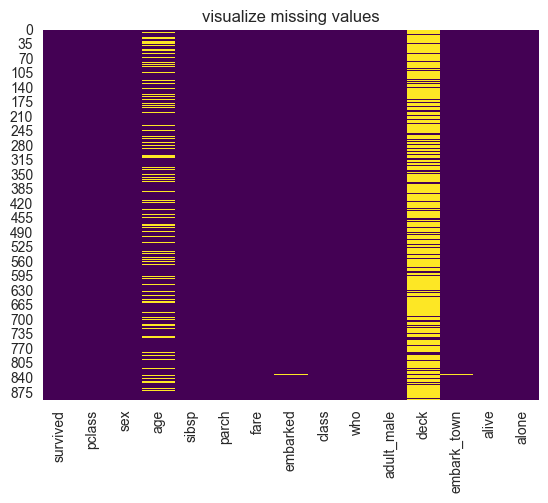

In [6]:
# Visualizing missing data

sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis')
plt.title("visualize missing values")
plt.show()



### Vérifier si Incohérences dans les Valeurs

Il peut y avoir des incohérences dans les données, comme des âges négatifs, des tarifs négatifs, ou des numéros de cabine incorrects..



In [9]:
#TBD
type(titanic_df)
print((titanic_df["age"] < 0).any().any())
print((titanic_df["fare"] < 0).any().any())

embark_town_counts = titanic_df['embark_town'].value_counts()
print(embark_town_counts)

embark_counts = titanic_df['embarked'].value_counts()
print(embark_counts)

survived_counts = titanic_df['survived'].value_counts()
print(survived_counts)

alive_counts = titanic_df['alive'].value_counts()
print(alive_counts)


False
False
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
survived
0    549
1    342
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64


### Verifier les données Aberrantes (Outliers)

Des valeurs aberrantes peuvent être présentes dans certaines colonnes, par exemple, des tarifs extrêmement élevés ou des âges très élevés.



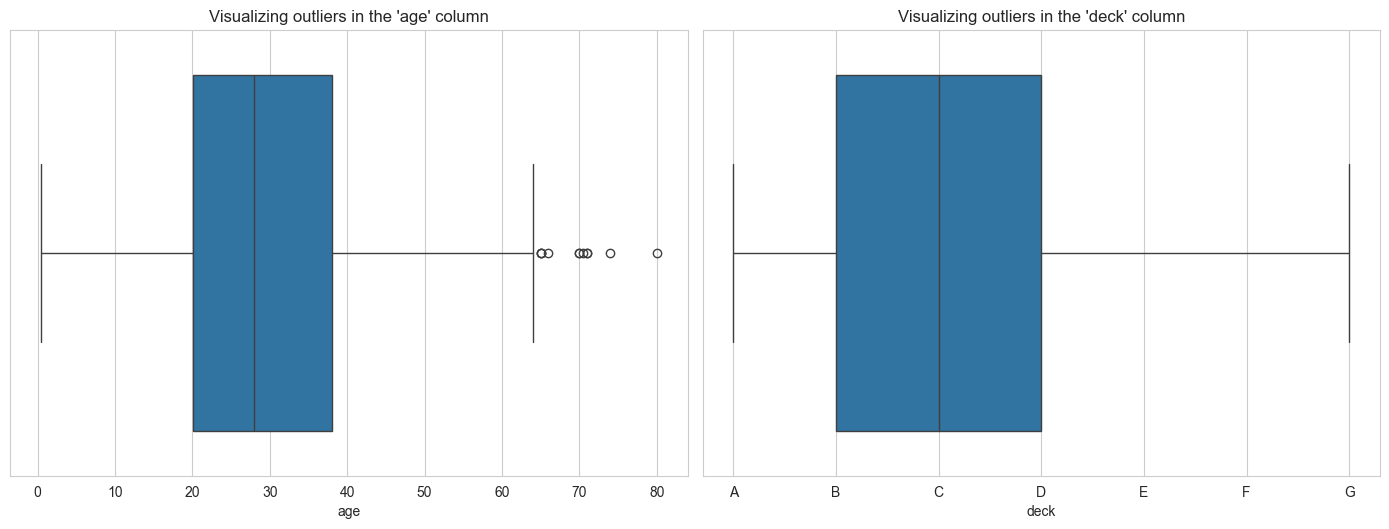

In [11]:
#TBD
# Visualizing outliers in the 'age' column

plt.figure(figsize=(14, 10))
plt.subplot(2,2,1)
sns.boxplot(data= titanic_df, x='age')
plt.title("Visualizing outliers in the 'age' column")


# Visualizing outliers in the 'deck' column
plt.subplot(2,2,2)
sns.boxplot(data= titanic_df, x='deck')
plt.title("Visualizing outliers in the 'deck' column")

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()

Columns in the DataFrame: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
             survived    pclass       sex       age     sibsp     parch  \
survived     1.000000 -0.338481 -0.543351 -0.077221 -0.035322  0.081629   
pclass      -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
sex         -0.543351  0.131900  1.000000  0.093254 -0.114631 -0.245489   
age         -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
sibsp       -0.035322  0.083081 -0.114631 -0.308247  1.000000  0.414838   
parch        0.081629  0.018443 -0.245489 -0.189119  0.414838  1.000000   
fare         0.257307 -0.549500 -0.182333  0.096067  0.159651  0.216225   
class       -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
who          0.472637 -0.016018 -0.722076 -0.468941  0.342977  0.413947   
adult_male  -0.557080  0.094035  0.

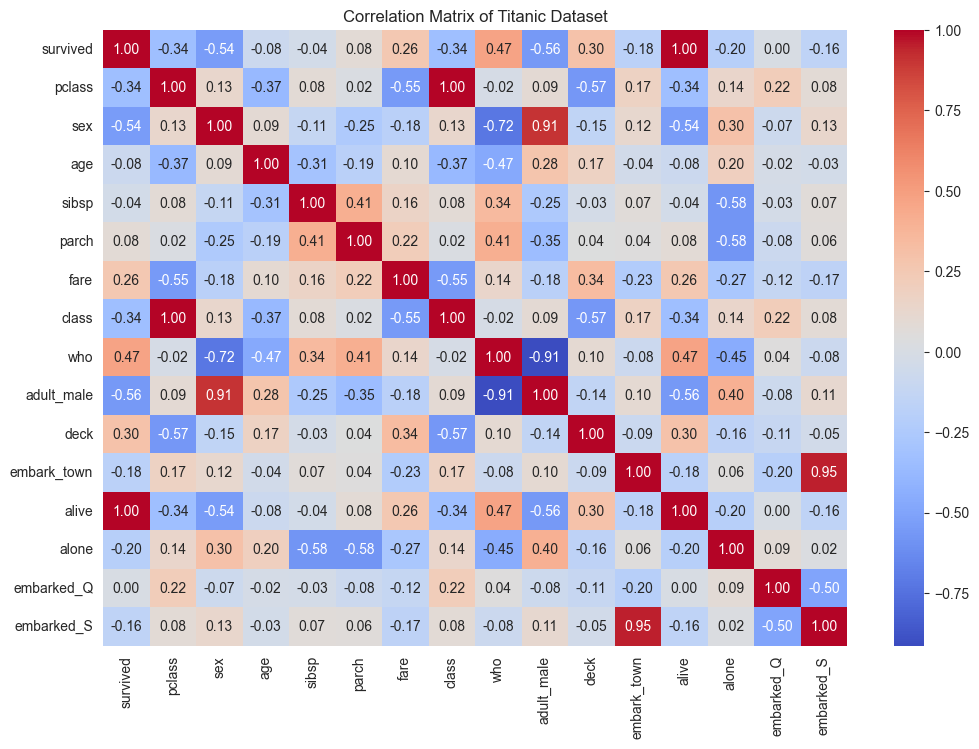

In [12]:

print("Columns in the DataFrame:", titanic_df.columns)

# Convert categorical columns to numeric
if 'sex' in titanic_df.columns:
    titanic_df['sex'] = titanic_df['sex'].map({'male': 1, 'female': 0})

if 'embarked' in titanic_df.columns:
    titanic_df = pd.get_dummies(titanic_df, columns=['embarked'], drop_first=True)

# Convert other categorical columns if necessary
if 'class' in titanic_df.columns:
    titanic_df['class'] = titanic_df['class'].map({'First': 1, 'Second': 2, 'Third': 3})
if 'who' in titanic_df.columns:
    titanic_df['who'] = titanic_df['who'].map({'man': 1, 'woman': 2, 'child': 3})
if 'deck' in titanic_df.columns:
    titanic_df['deck'] = titanic_df['deck'].astype('category').cat.codes
if 'embark_town' in titanic_df.columns:
    titanic_df['embark_town'] = titanic_df['embark_town'].astype('category').cat.codes
if 'alive' in titanic_df.columns:
    titanic_df['alive'] = titanic_df['alive'].map({'yes': 1, 'no': 0})
if 'alone' in titanic_df.columns:
    titanic_df['alone'] = titanic_df['alone'].astype(int)

# Calculate the correlation matrix
correlation_matrix = titanic_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

### Vérifier les Doublons


Il peut y avoir des lignes en double dans le dataset, ce qui signifie que les mêmes données apparaissent plusieurs fois et il faut donc les supprimer

In [10]:
#TBD
duplicate = titanic_df[titanic_df.duplicated()] #returns all the rows that gives true output for dublicateed() function 
print(titanic_df.duplicated())
print("Duplicate Rows :")
duplicate

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool
Duplicate Rows :


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_Q,embarked_S
47,1,3,0,NaN,0,0,7.7500,3,2,False,-1,1,1,1,True,False
76,0,3,1,NaN,0,0,7.8958,3,1,True,-1,2,0,1,False,True
77,0,3,1,NaN,0,0,8.0500,3,1,True,-1,2,0,1,False,True
87,0,3,1,NaN,0,0,8.0500,3,1,True,-1,2,0,1,False,True
95,0,3,1,NaN,0,0,8.0500,3,1,True,-1,2,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,1,26.0,0,0,7.8958,3,1,True,-1,2,0,1,False,True
877,0,3,1,19.0,0,0,7.8958,3,1,True,-1,2,0,1,False,True
878,0,3,1,NaN,0,0,7.8958,3,1,True,-1,2,0,1,False,True
884,0,3,1,25.0,0,0,7.0500,3,1,True,-1,2,0,1,False,True


### Vérifier si colonnes Inutiles

Certaines colonnes peuvent contenir des données redondantes ou inutiles pour l'analyse.

In [11]:
# #TBD
# # Drop columns that are redundant or unnecessary
# columns_to_drop = ['class', 'who', 'deck', 'embark_town', 'alive']
# titanic_df.drop(columns=columns_to_drop,axis = 1,inplace=True)

# # Handle missing values (for simplicity, dropping rows with missing values)
# titanic_df.dropna(inplace=True)
# titanic_df.head()

In [13]:
# titanic_df.head()
# titanic_df.corr()

## Bonus

**Continuez l'exploration du dataset Titanic avec d'autres axes d'analyse **



1-What is the distribution of passengers by class (1st, 2nd, 3rd) on board the Titanic?

2- What is the gender distribution of passengers aboard Titanic?

3- What was the average age of passengers aboard Titanic? Were there very young or very old passengers?

4- How many passengers survived the sinking of the Titanic? How were they distributed by class, sex and age?


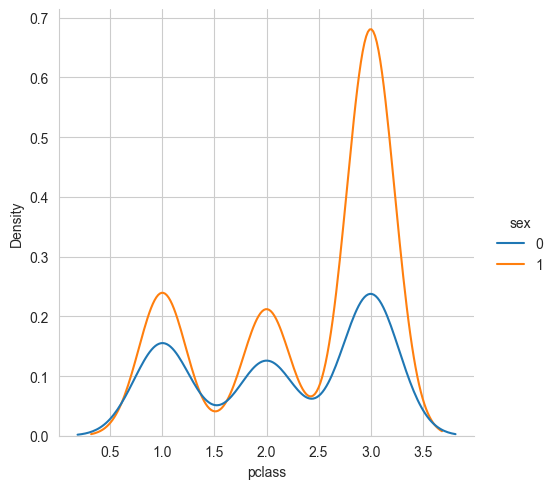

In [13]:
#TBD 1-What is the distribution of passengers by class (1st, 2nd, 3rd) on board the Titanic?
sns.displot(titanic_df, x="pclass", hue = "sex",kind="kde")


Gender distribution of passengers:
 sex
1    577
0    314
Name: count, dtype: int64


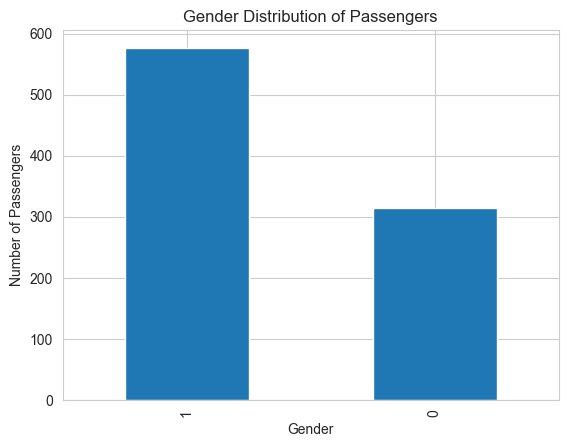

In [14]:
#2- What is the gender distribution of passengers aboard Titanic?
# Distribution of passengers by gender
gender_distribution = titanic_df['sex'].value_counts()
print("Gender distribution of passengers:\n", gender_distribution)

# Visualizing the gender distribution
gender_distribution.plot(kind='bar', title='Gender Distribution of Passengers')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()



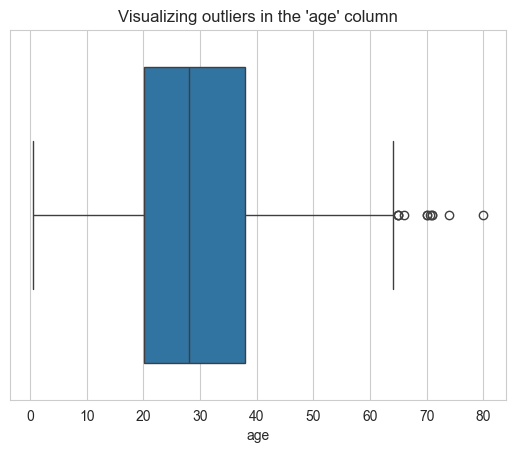

In [15]:
#What was the average age of passengers aboard Titanic? Were there very young or very old passengers?

sns.boxplot(data= titanic_df, x='age')
plt.title("Visualizing outliers in the 'age' column")
plt.show()

number of survivors 342
survival per class: pclass
1    136
3    119
2     87
Name: count, dtype: int64
Survivors distribution by gender: sex
0    233
1    109
Name: count, dtype: int64
Average age of survivors: 28.343689655172415


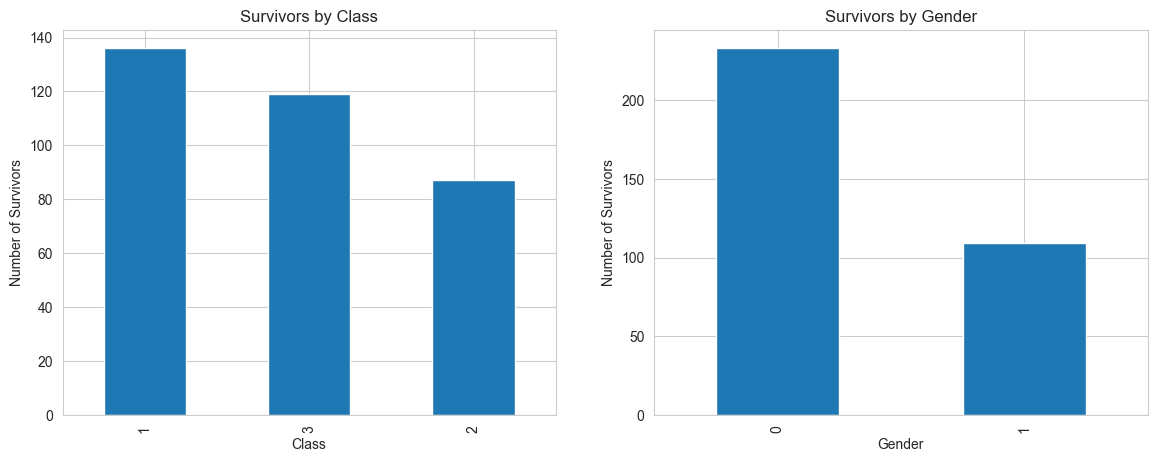

In [16]:
#How many passengers survived the sinking of the Titanic? How were they distributed by class, sex and age?

survivors_count = titanic_df['survived'].sum() #number of passengers who survived
print("number of survivors",survivors_count)

survival_by_class = titanic_df[titanic_df["survived"] == 1]['pclass'].value_counts()# Distribution of survivors by class
print("survival per class:",survival_by_class)


survivors_by_gender = titanic_df[titanic_df['survived'] == 1]['sex'].value_counts()# Distribution of survivors by gender
print("Survivors distribution by gender:", survivors_by_gender)

average_age_survivors = titanic_df[titanic_df['survived'] == 1]['age'].mean()# Average age of survivors
print("Average age of survivors:", average_age_survivors)

# Visualizing 
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

survival_by_class.plot(kind='bar', ax=axs[0], title='Survivors by Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Number of Survivors')

survivors_by_gender.plot(kind='bar', ax=axs[1], title='Survivors by Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Number of Survivors')

plt.show()